In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from gp import GaussianProcess

plt.rcParams['figure.figsize'] = [8, 3]

### initialize function to approximate via GP

Text(0, 0.5, 'f(x)')

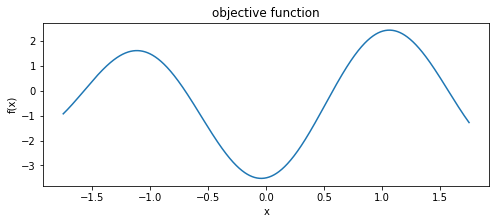

In [2]:
x = np.atleast_2d(np.linspace(-1.75, 1.75, 1000)).T

def f(x):
    return - np.cos(x) - 2.5 * np.cos(3*x) + 0.5 * np.sin(2*x)

y = f(x)

plt.plot(x,y)
plt.title('objective function')
plt.xlabel('x')
plt.ylabel('f(x)')

### my GP implementation

Text(0.5, 1.0, 'functions sampled from posterior')

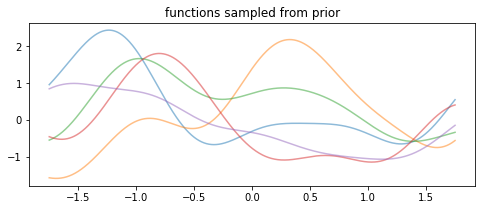

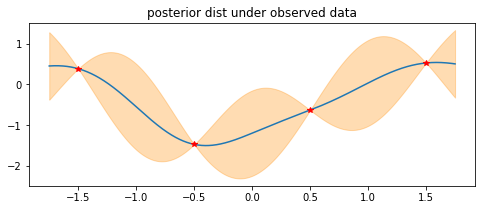

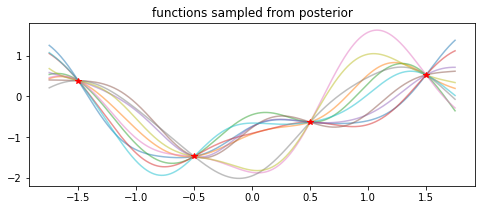

In [3]:
my_gp = GaussianProcess(kernel = 'rbf')

for i in range(5):
    sampled_y = my_gp.sample_y(x)

    plt.plot(x,sampled_y,alpha = 0.5)
    plt.title('functions sampled from prior')

train_x = np.atleast_2d([-1.5,-0.5,0.5,1.5]).T
train_y = f(train_x).ravel()

my_gp.fit(train_x,train_y)
plt.figure()


post_mean, post_var = my_gp.predict(x,return_std=True)

lower = post_mean.squeeze() - 2*post_var
upper = post_mean.squeeze() + 2*post_var

plt.plot(x,post_mean)
plt.fill_between(x.squeeze(),lower,upper,alpha = 0.3,color = 'darkorange')
plt.plot(train_x,train_y,'r*',)
plt.title('posterior dist under observed data')

plt.figure()
for i in range(10):
    sampled_y = my_gp.sample_y(x)
    
    plt.plot(x,sampled_y,alpha = 0.5)
plt.plot(train_x,train_y,'r*',)
plt.title('functions sampled from posterior')


### sklearn GP implementation

Text(0.5, 1.0, 'functions sampled from posterior')

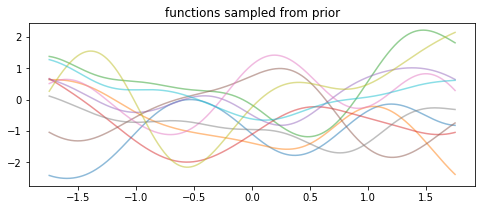

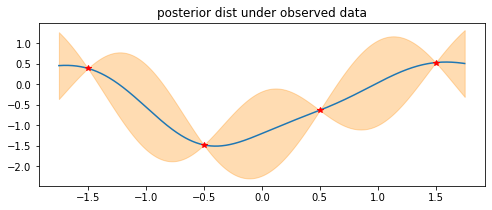

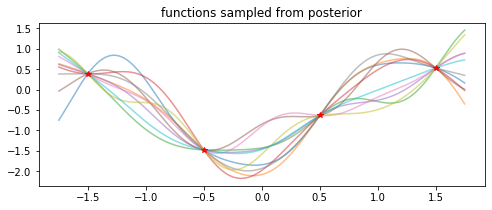

In [4]:
kernel = 0.8 * RBF(0.5,length_scale_bounds="fixed")

gpr = GaussianProcessRegressor(kernel=kernel)

for i in range(10):
    sampled_y = gpr.sample_y(x,random_state=i)

    plt.plot(x,sampled_y,alpha = 0.5)
    plt.title('functions sampled from prior')

train_x = np.atleast_2d([-1.5,-0.5,0.5,1.5]).T
train_y = f(train_x).ravel()

gpr.fit(train_x,train_y)
plt.figure()



post_mean, post_var = gpr.predict(x,return_std=True)

lower = post_mean.squeeze() - 2*post_var
upper = post_mean.squeeze() + 2*post_var

plt.plot(x,post_mean)
plt.fill_between(x.squeeze(),lower,upper,alpha = 0.3,color = 'darkorange')
plt.plot(train_x,train_y,'r*',)
plt.title('posterior dist under observed data')


plt.figure()
for i in range(10):
    sampled_y = gpr.sample_y(x,random_state=i)
    
    plt.plot(x,sampled_y,alpha = 0.5)
plt.plot(train_x,train_y,'r*',)
plt.title('functions sampled from posterior')